<h1 align="center">Volume 4: Spectral 2.</h1>

Caelan Osman

Jan, 8, 2022

In [1]:
import numpy as np
import sympy as sy
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Sample Code

<IPython.core.display.Javascript object>


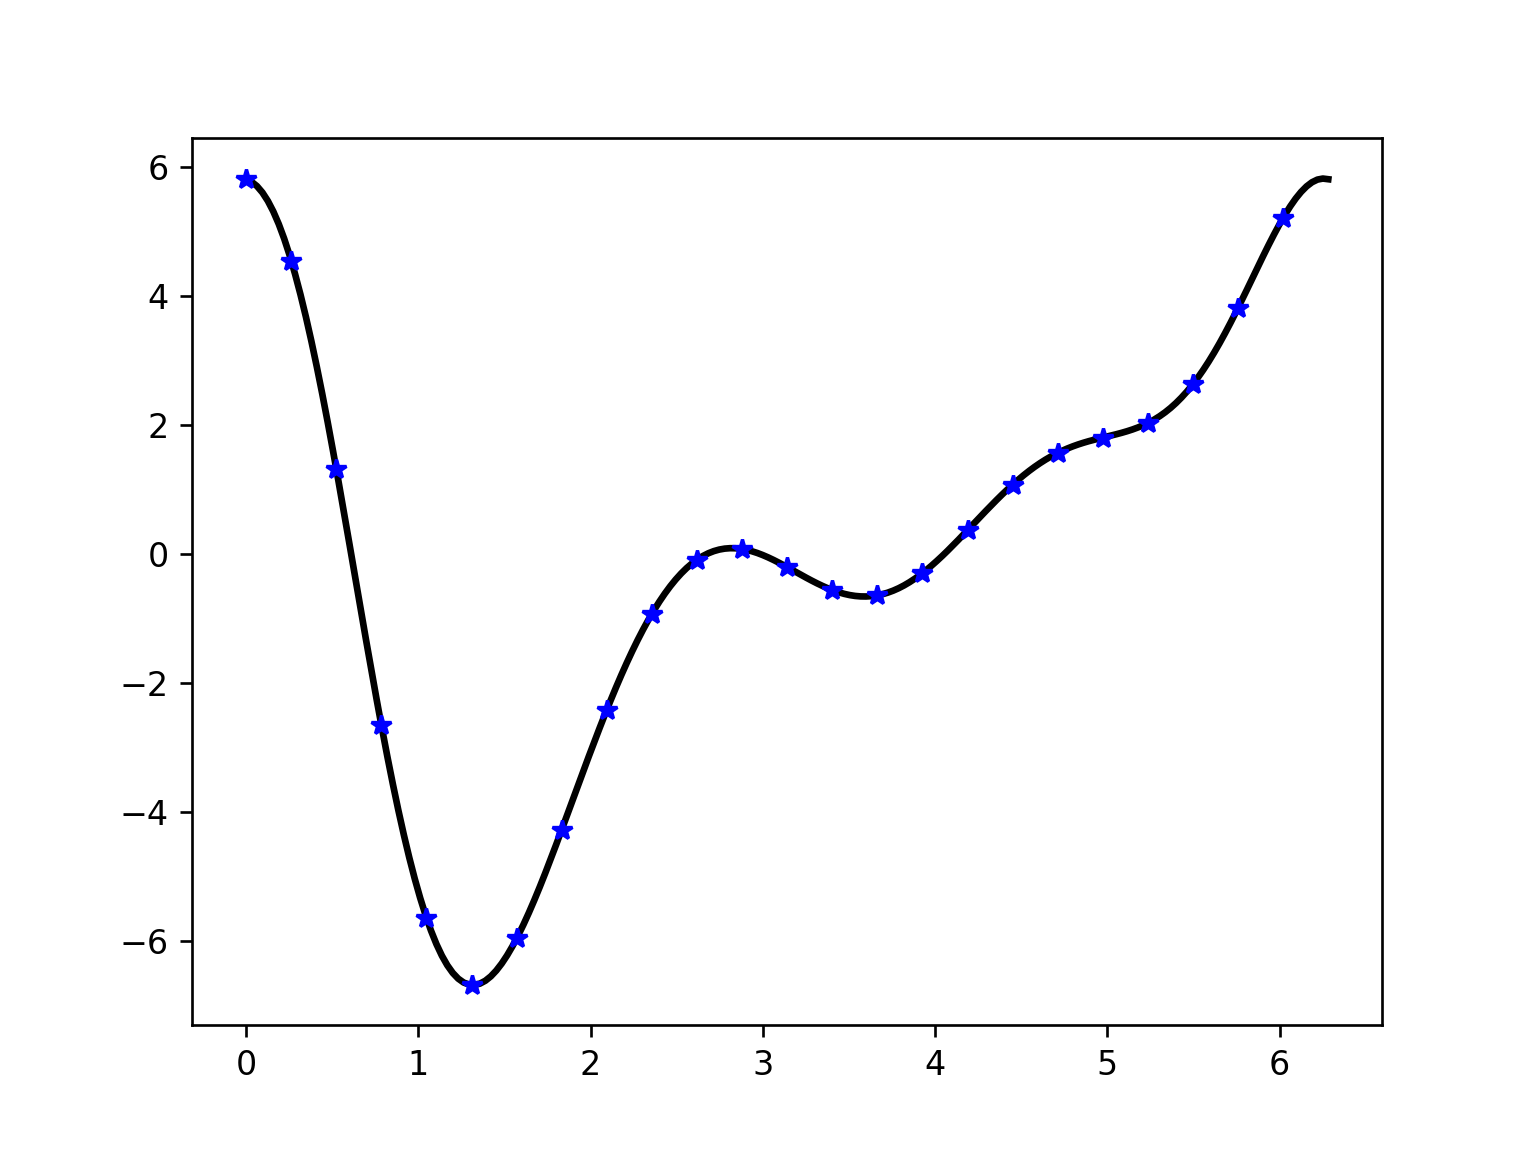

In [3]:
def sample():

    N=24
    x1 = (2.*np.pi/N)*np.arange(N)
    f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

    k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

    # Approximates the derivative using the pseudo spectral method
    f_hat = fft(f)
    fp_hat = ((1j*k)*f_hat)
    fp = np.real(ifft(fp_hat))

    # Calculates the derivative analytically
    x2 = np.linspace(0,2*np.pi,200)
    derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

    plt.plot(x2,derivative,'-k',linewidth=2.)
    plt.plot(x1,fp,'*b')
    plt.show()
    return
sample()

# Problem 1
Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

<IPython.core.display.Javascript object>


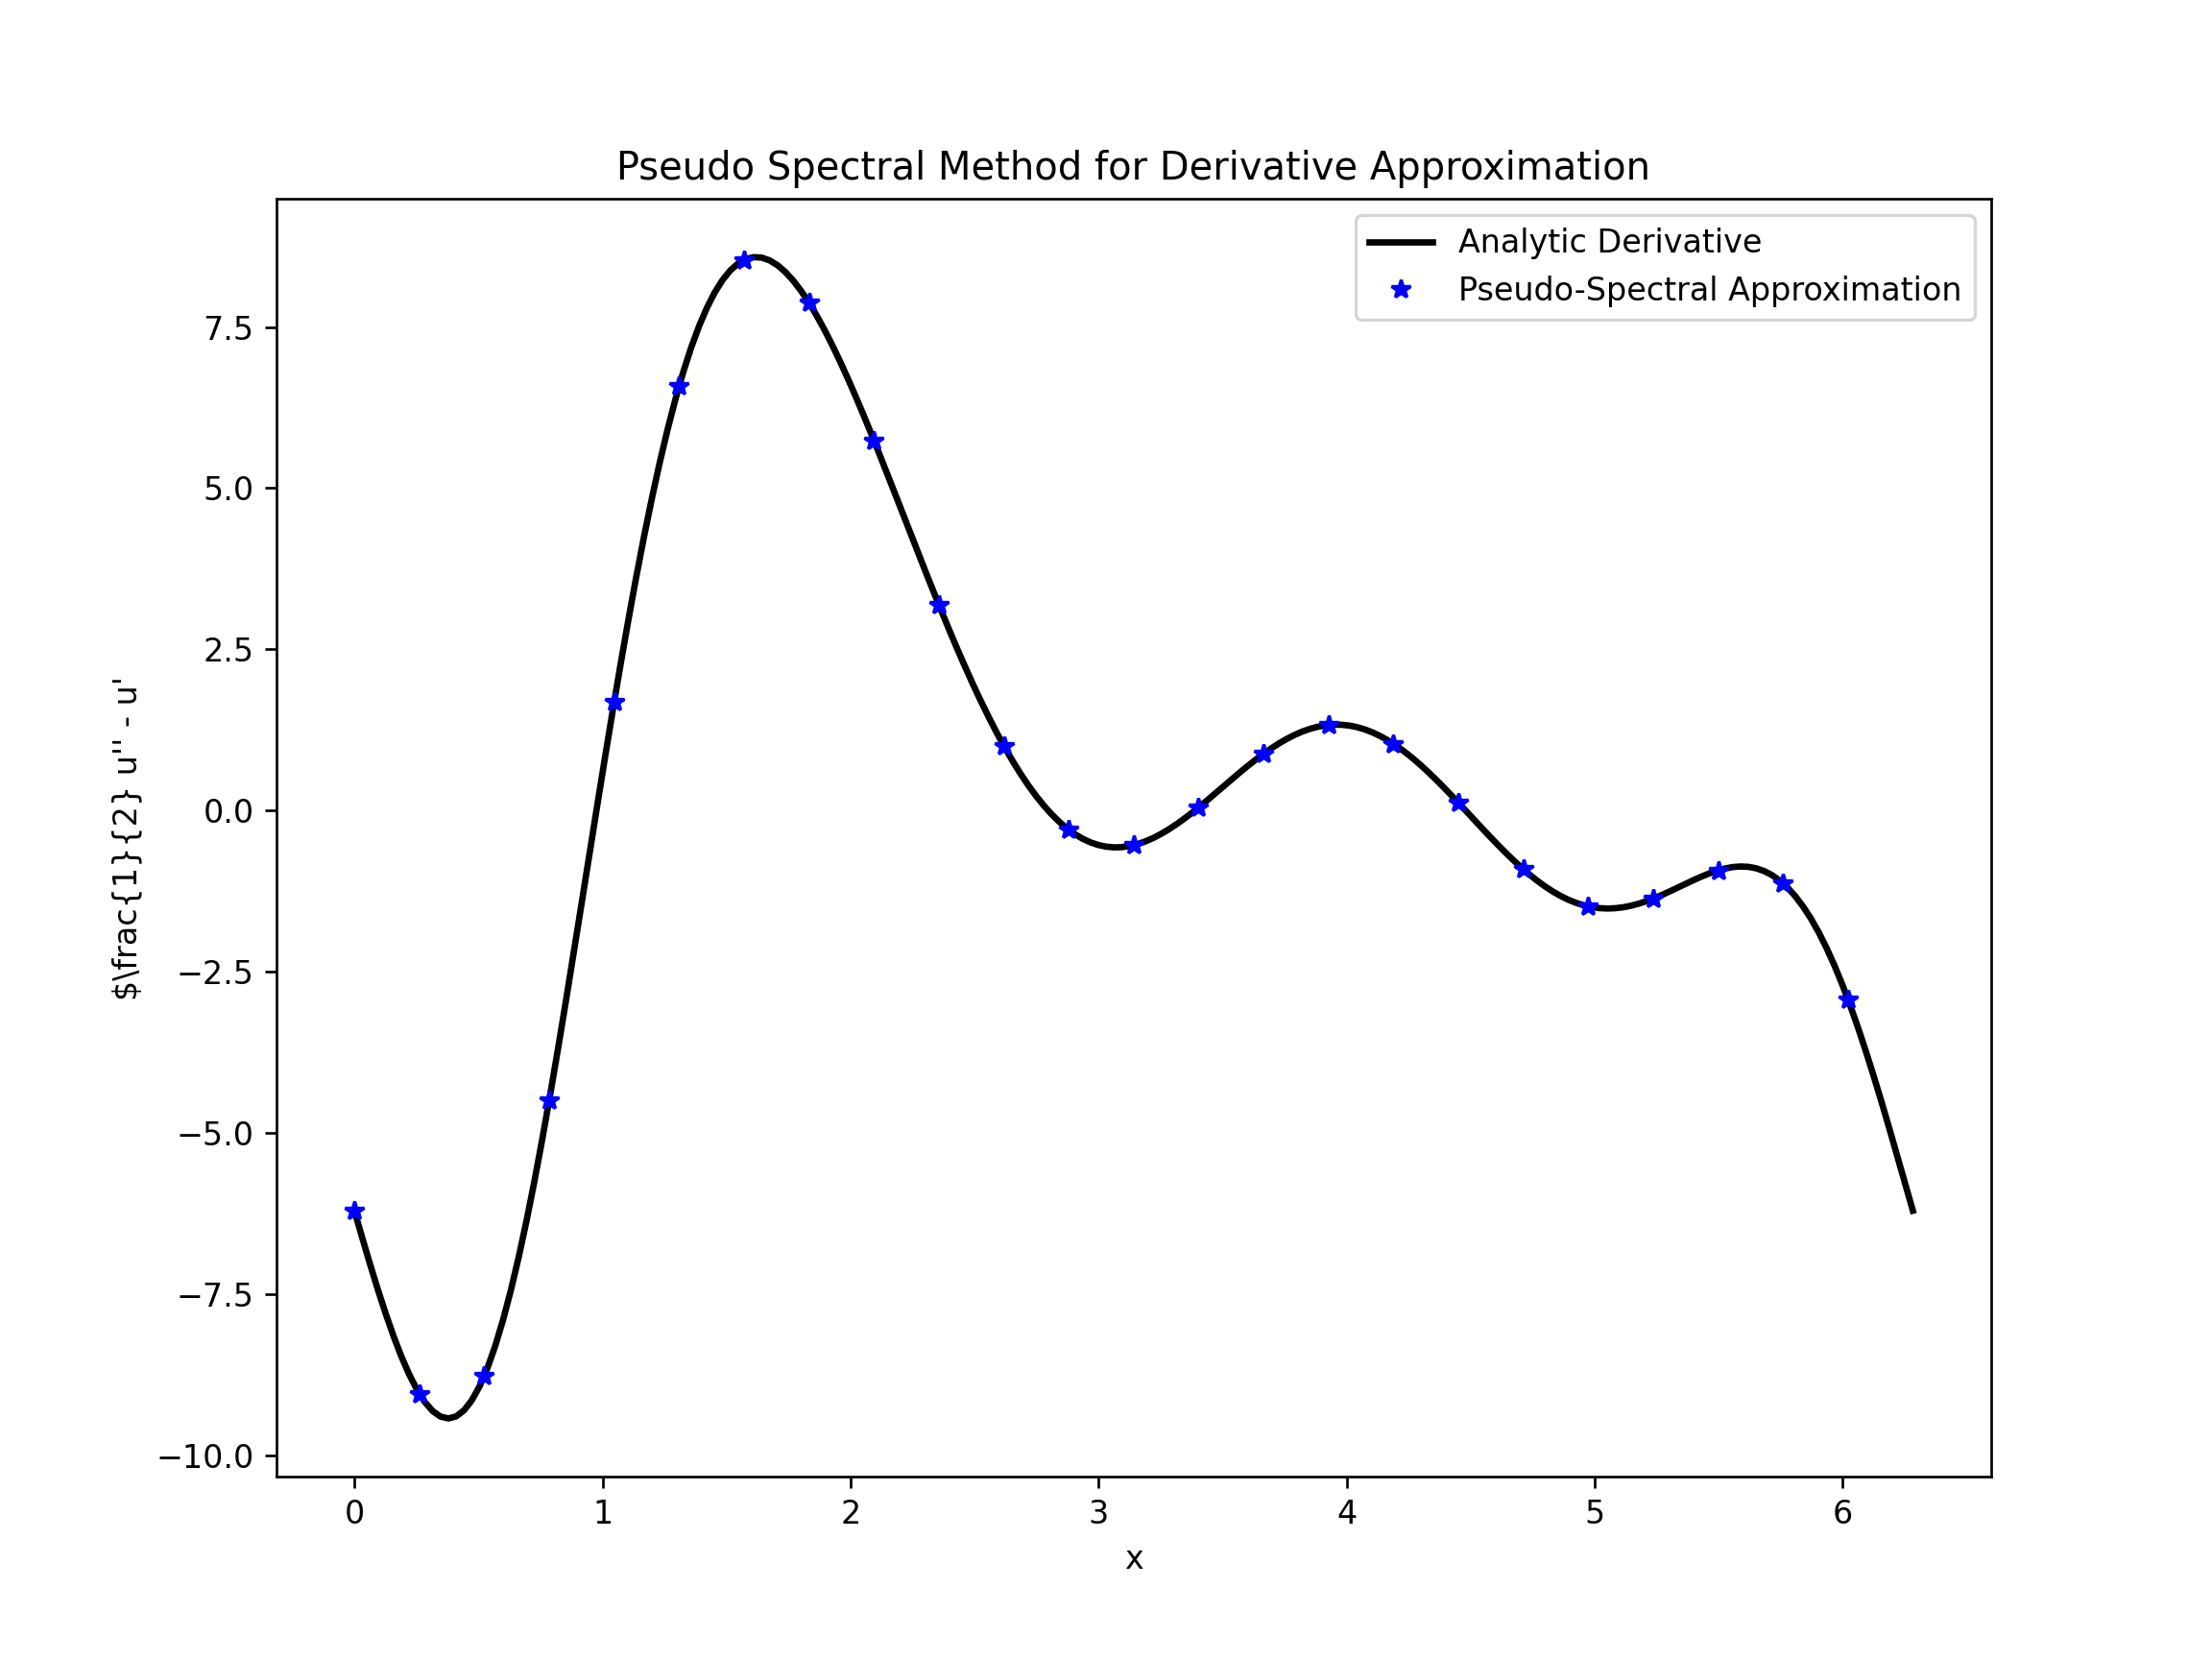

In [27]:
def problem1(N=24):
    #create expression from sympy
    x = sy.symbols('x')
    expr = sy.sin(x)**2 * sy.cos(x) + sy.exp(2*sy.sin(x+1))
    #creat ethe function for a function call
    u = sy.lambdify(x, expr, 'numpy')
    #creat the function we want to approximate
    analytic = sy.lambdify(x,
                            sy.Rational(1, 2)*sy.diff(sy.diff(expr, x), x)
                            - sy.diff(expr, x),
                            'numpy')
    x1 = (2.*np.pi/N)*np.arange(N)

    #discretize our rfunction
    f = u(x1)
    #add the wave numbers
    k = np.concatenate(( np.arange(0,N/2) ,
                        np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                        np.arange(-N/2+1,0) ))

    #now we approximate using pseudo spectral method
    f_hat = fft(f)
    fp_hat = 1j*k*f_hat
    fpp_hat = 0.5*-k**2*f_hat
    approx = np.real(ifft(fpp_hat - fp_hat))
    #now we plot against the analytic
    domain = np.linspace( 0,2*np.pi,200)
    #now we plot the functions
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(domain, analytic(domain), 'k-', linewidth=2, label='Analytic Derivative' )
    ax.plot(x1, approx, '*b', label='Pseudo-Spectral Approximation')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel(r"$\frac{1}{2} u'' - u'")
    ax.set_title('Pseudo Spectral Method for Derivative Approximation')
    plt.show()

    return

problem1()

# Problem 2 - setup

In [2]:
def initialize_all(a, b, y0, h):
    n = int((b-a)/h)+1
    X = np.linspace(a, b, n)
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X, Y, h, int(n)

def RK4(f,X,Y,h,n):
    for i in range(n-1):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2,Y[i]+h/2*K1)
        K3 = f(X[i]+h/2,Y[i]+h/2*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6*(K1+2*K2+2*K3+K4)
    return Y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

<IPython.core.display.Javascript object>


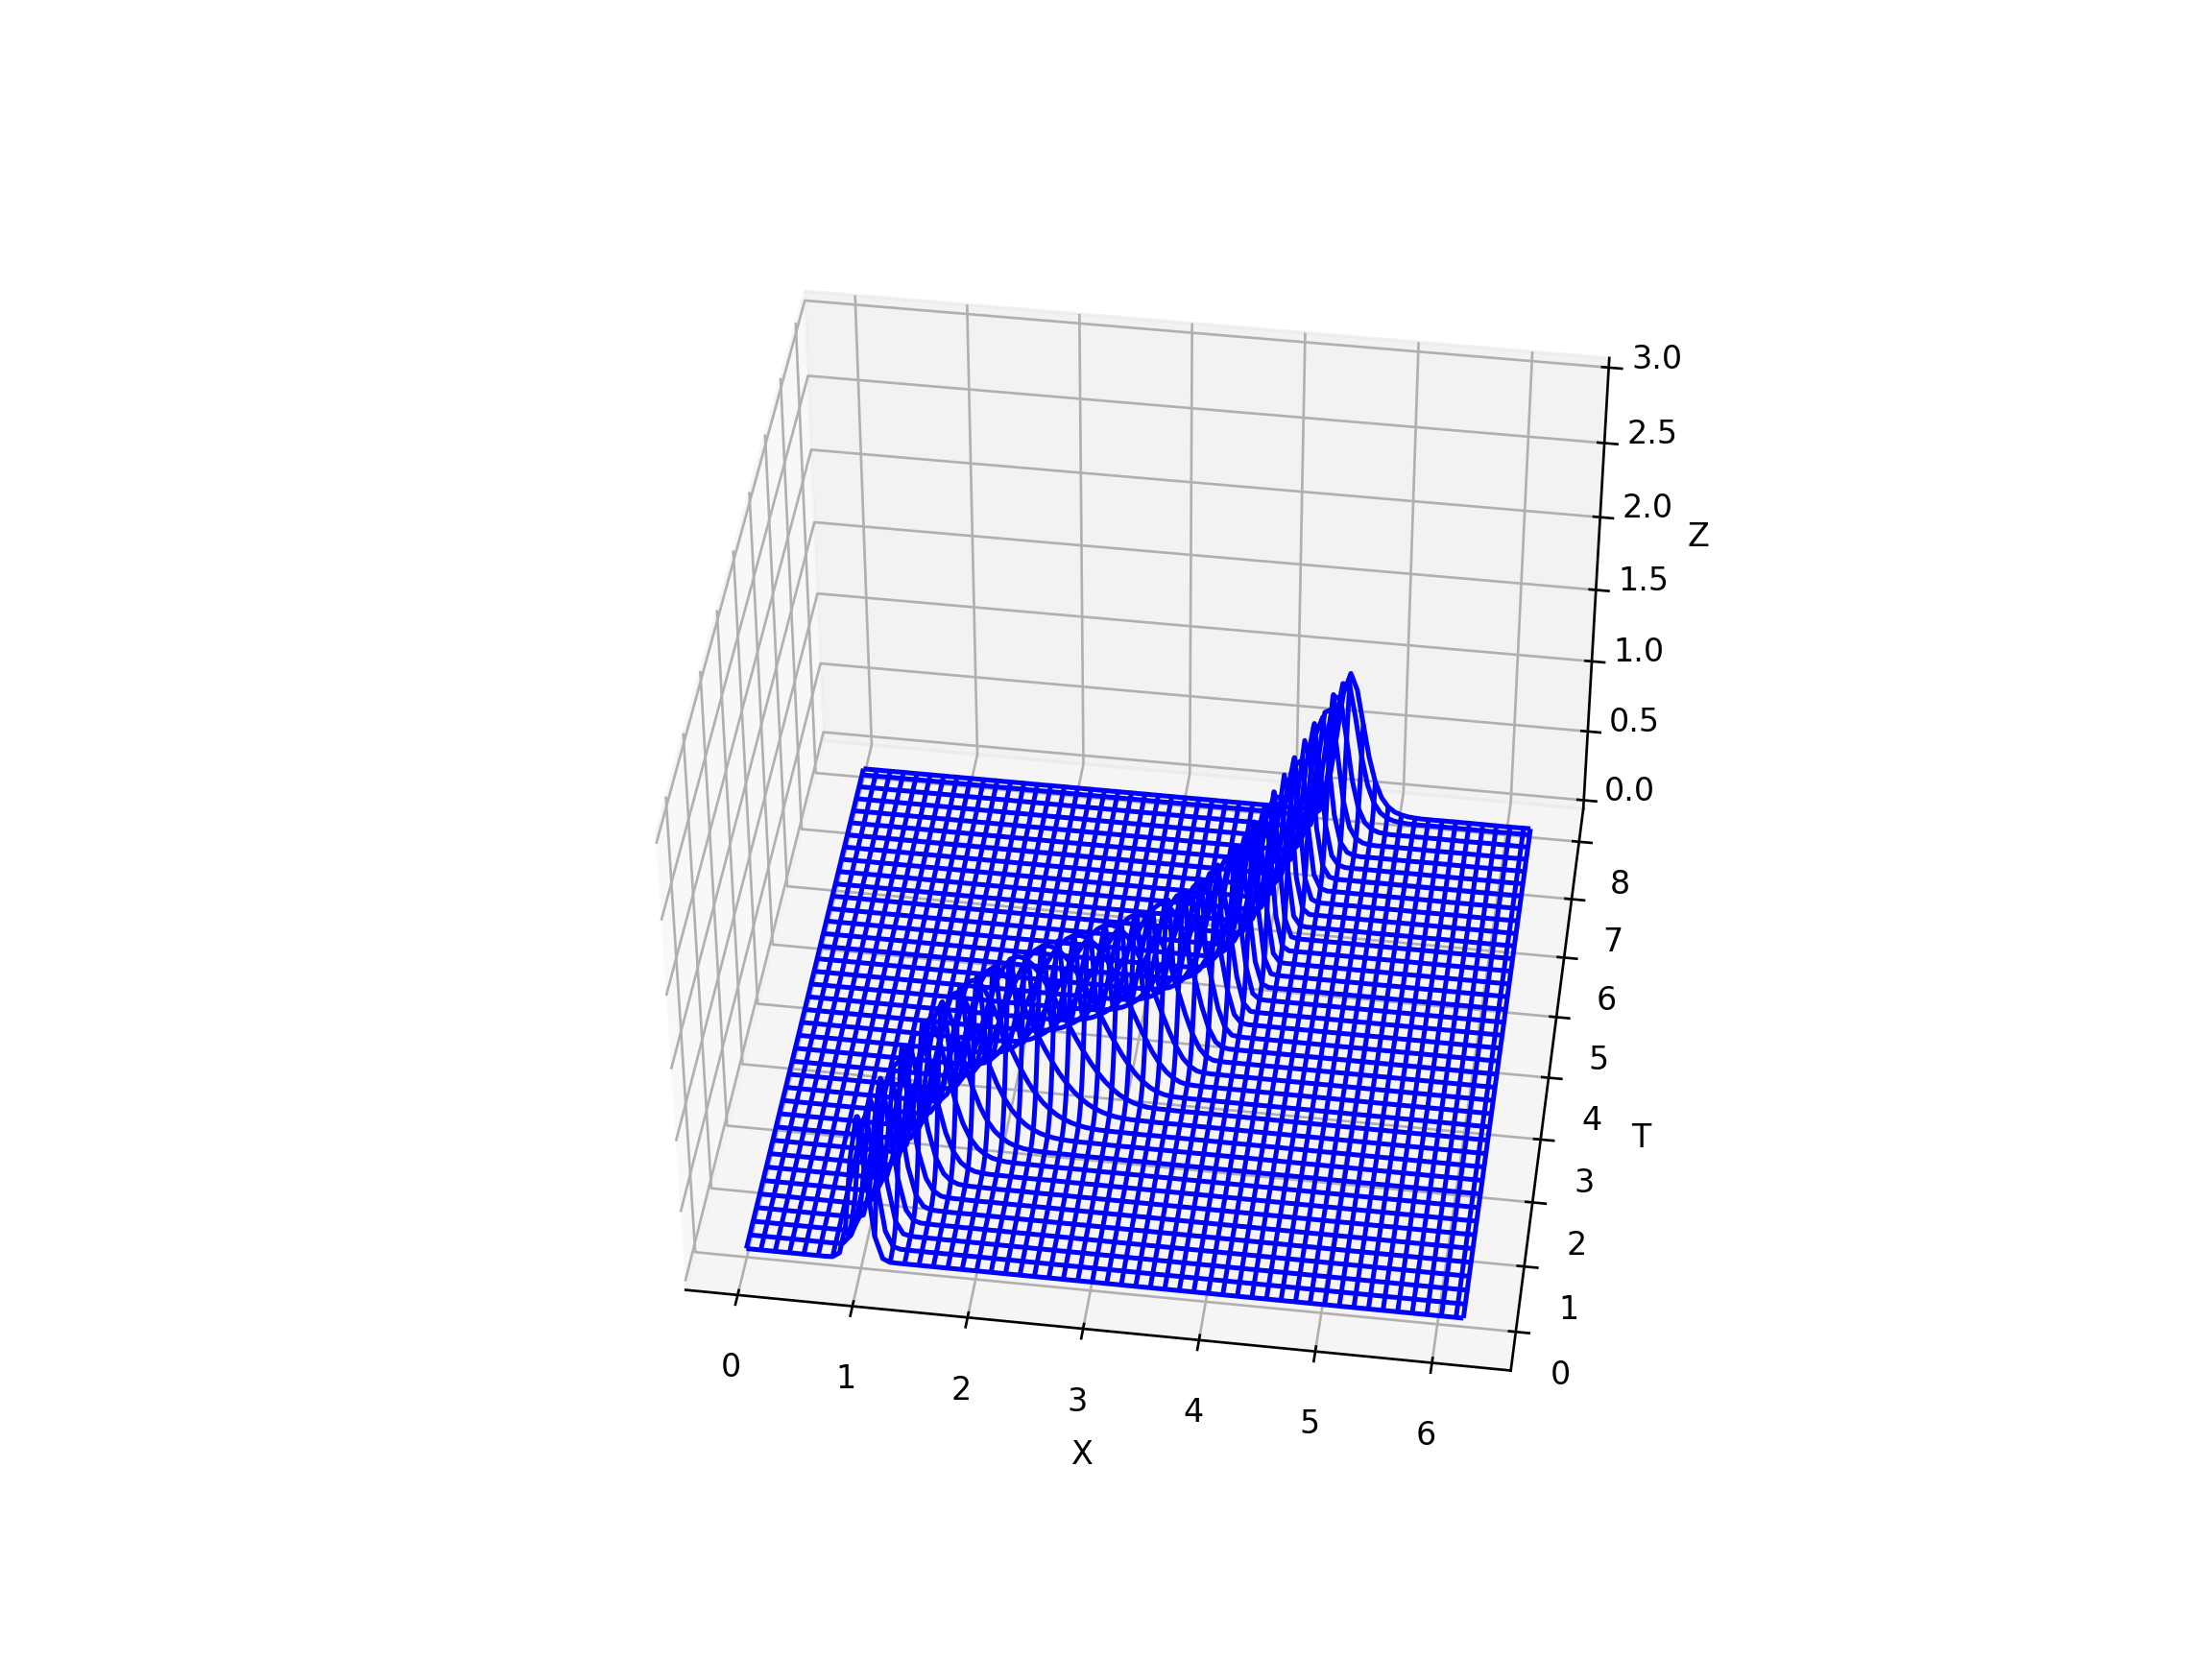

In [8]:
def problem2(a, b, t0, tf, x_steps=100, t_steps = 150):
    #wave speed and initial condition function
    c = lambda x: 0.2 + (np.sin(x-1))**2
    IC = lambda x: np.exp(-100*(x-1)**2)

    #set up Fourier grid points on [0, π], h, and discretized time domain
    x_fourier = 2*np.pi/x_steps * np.arange(x_steps)
    t_space = np.linspace(t0, tf, t_steps+1)
    
    #get initial condition and initialize all variables
    u0 = IC(x_fourier)
    X, Y, h, n = initialize_all(t0, tf, u0, (tf-t0)/(t_steps))
    
    #now we define our vector field (don't forget the wave numbers)
    def f(x,y, N=x_steps):
        k = np.concatenate((np.arange(0,N/2),
                            np.array([0]),
                            np.arange(-N/2+1,0)))
        
        return np.real(-c(x_fourier)*ifft(1j*k*fft(y)))
    
    #get our solution using runge kutta
    sol = RK4(f, X, Y, h, n)
    #then plot
    X, T = np.meshgrid(x_fourier, t_space)
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_wireframe(X, T, sol, color='blue')
    ax.set_zlim(0,3)
    ax.set_xlabel('X')
    ax.set_ylabel('T')
    ax.set_zlabel('Z')
    plt.show()
    return

problem2(0, 2*np.pi, 0, 8, x_steps=100, t_steps=150)